# trainONE model7

ADD one hand dataset, each 500
- longfor
- if
- rise

Epoch 00149: val_acc improved from 0.96886 to 0.97059, saving model to models/model.h5

Epoch 00150: val_acc did not improve from 0.97059

In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
actions = [
           'longfor',
           'rainbow',
           'sincerely',
           'if',
           'rise'
]

data = np.concatenate([
                       # longfor
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_longfor_1633679203.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_longfor_1633681097.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_longfor_1633683436.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_longfor_1633683644.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_longfor_1634026245.npy'),    #500
                       # rainbow
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_rainbow_1633679203.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_rainbow_1633681097.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_rainbow_1633683436.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_rainbow_1633683644.npy'),
                       # sincerely
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_sincerely_1634025250.npy'),  #100
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_sincerely_1634025282.npy'),  #100
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_sincerely_1634025310.npy'),   #500
                       # if
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_if_1634026245.npy'), #500
                       # rise
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/ONEseq_rise_1634026245.npy')    #500
], axis=0)

data.shape

(5780, 30, 117)

In [4]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(len(actions))

(5780, 30, 116)
(5780,)
5


In [5]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))

y_data.shape

(5780, 5)

In [6]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(5202, 30, 116) (5202, 5)
(578, 30, 116) (578, 5)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                46336     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 48,581
Trainable params: 48,581
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/150
163/163 [==============================] - 6s 25ms/step - loss: 42.0999 - acc: 0.3604 - val_loss: 3.3733 - val_acc: 0.4602

Epoch 00001: val_acc improved from -inf to 0.46021, saving model to models/model.h5
Epoch 2/150
163/163 [==============================] - 3s 21ms/step - loss: 2.3509 - acc: 0.4954 - val_loss: 2.2447 - val_acc: 0.5830

Epoch 00002: val_acc improved from 0.46021 to 0.58305, saving model to models/model.h5
Epoch 3/150
163/163 [==============================] - 3s 21ms/step - loss: 1.3986 - acc: 0.6175 - val_loss: 1.7300 - val_acc: 0.6211

Epoch 00003: val_acc improved from 0.58305 to 0.62111, saving model to models/model.h5
Epoch 4/150
163/163 [==============================] - 4s 23ms/step - loss: 1.1374 - acc: 0.6753 - val_loss: 1.3750 - val_acc: 0.7353

Epoch 00004: val_acc improved from 0.62111 to 0.73529, saving model to models/model.h5
Epoch 5/150
163/163 [==============================] - 4s 24ms/step - loss: 1.0103 - acc: 0.7272 - val_loss: 1.181

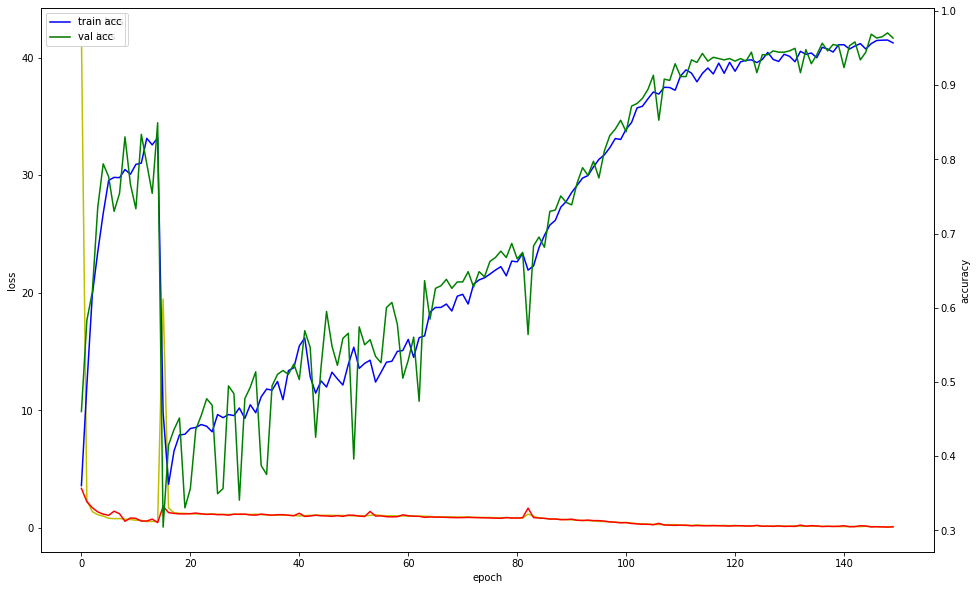

In [9]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [10]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[334,   3],
        [  1, 240]],

       [[378,   4],
        [  6, 190]],

       [[523,   8],
        [  4,  43]],

       [[529,   0],
        [  5,  44]],

       [[531,   2],
        [  1,  44]]])

In [11]:
from keras.models import load_model

model.save('ONEmodel7.h5')

from google.colab import files
files.download('ONEmodel7.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>